<a href="https://colab.research.google.com/github/Shaitender/TextExtraction/blob/master/FastText_Effective_Date.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install fasttext

     |████████████████████████████████| 61kB 3.0MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.1-cp36-cp36m-linux_x86_64.whl size=2379702 sha256=37017c1cb1aead1c2fecdcca39e1c0376f09dde56430f0ae25e7cd52517e734e
  Stored in directory: /root/.cache/pip/wheels/9f/f0/04/caa82c912aee89ce76358ff954f3f0729b7577c8ff23a292e3
Successfully built fasttext


In [0]:
import pandas as pd
datesDf = pd.read_excel('/content/Effective Date Option Dataset.xlsx')
datesDf.head()

,Effective Date Options,String
0,Later of the two signatures,the â€œagreementâ€) is entered into as of the...
1,Specific Date,llc contractor: globallogic inc. -docusigned b...
2,Specific Date,your acceptance of the above by signing and r...
3,NO MATCH,your acceptance of the above by signing and r...
4,Specific Date,your acceptance of the above by signing and r...


In [0]:
datesDf['Effective Date Options'].value_counts()

Later of the two signatures                              3591
First day of the month in which the Last Party sign      3168
First day of following month in which Last Party Sign    2898
Specific Date                                            2739
Partner/Customer Sign Date                               2376
Google Sign Date                                         2360
NO MATCH                                                 2290
First day of the month in which Google Sign              2052
First day of following month in which Google Sign        2016
Partner/Customer Sign date                                108
Name: Effective Date Options, dtype: int64

In [0]:
#drop NoMatch rows
datesDf.drop(datesDf[datesDf['Effective Date Options'].apply(lambda x: x.startswith('NO MATCH'))].index, inplace=True)
datesDf.drop(datesDf[datesDf['String'].apply(lambda x: x.startswith('NO MATCH'))].index, inplace=True)

#create options string as per fasttext input
datesDf['Effective Date Options']= ['__label__' + options.replace(' ','_').lower() for options in datesDf['Effective Date Options']]

#drop dublicates
datesDf.drop_duplicates(subset=['Effective Date Options', 'String'], keep=False)

,Effective Date Options,String
0,__label__later_of_the_two_signatures,the â€œagreementâ€) is entered into as of the...
1,__label__specific_date,llc contractor: globallogic inc. -docusigned b...
2,__label__specific_date,your acceptance of the above by signing and r...
4,__label__specific_date,your acceptance of the above by signing and r...
5,__label__later_of_the_two_signatures,of the above by signing and returning the enc...
6,__label__specific_date,your acceptance of the above by signing and r...
7,__label__later_of_the_two_signatures,your acceptance of the above by signing and r...
8,__label__specific_date,docusign envelope id: 588c2cfa-2cb0-45da-ad22-...
9,__label__specific_date,ala.kc@tcs.com google project manager: erbil y...
10,__label__specific_date,bala.kc@tcs.com google project manager: minha...


In [0]:
datesDf['Effective Date Options'].value_counts()

__label__later_of_the_two_signatures                              3591
__label__first_day_of_the_month_in_which_the_last_party_sign      3168
__label__first_day_of_following_month_in_which_last_party_sign    2898
__label__specific_date                                            2739
__label__partner/customer_sign_date                               2484
__label__google_sign_date                                         2360
__label__first_day_of_the_month_in_which_google_sign              2052
__label__first_day_of_following_month_in_which_google_sign        2016
Name: Effective Date Options, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

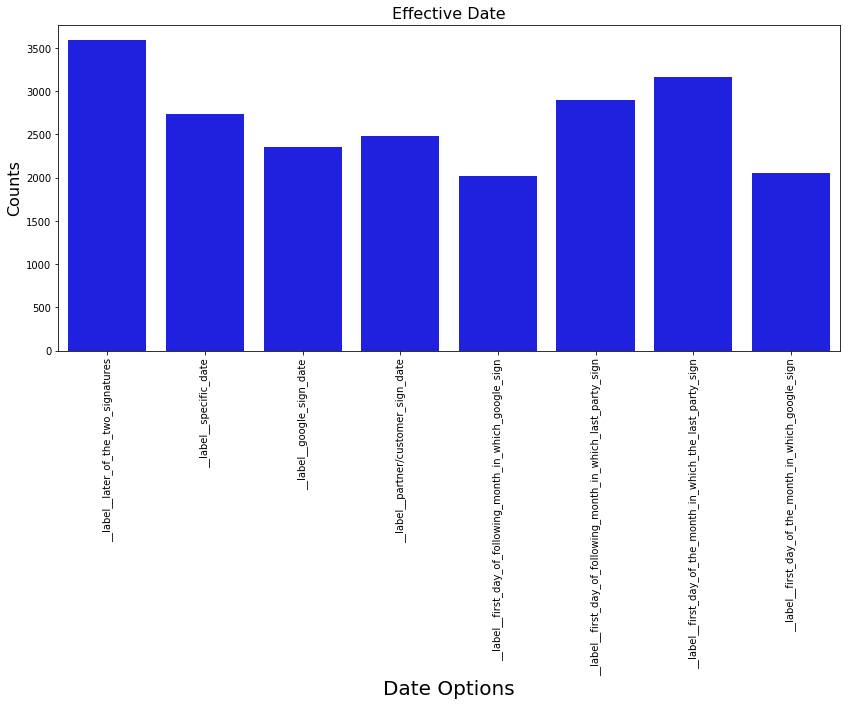

In [0]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
sns.countplot(x=datesDf['Effective Date Options'], color='blue')
plt.title('Effective Date', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.xlabel('Date Options', fontsize=20)
plt.xticks(rotation='vertical')

In [0]:
!pip install nltk

In [0]:
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
from nltk.corpus import stopwords

def preProcessing(text):
    text = text.lower().replace('[^\w\s]','')
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    # remove stopwords
    stop = stopwords.words('english')
    tokens = [token for token in tokens if token not in stop]
    preprocessed_text= ' '.join(tokens)
    return preprocessed_text

In [0]:
#remove stop words
datesDf['String'] = datesDf['String'].apply(preProcessing)

#suffle data 
datesDf = datesDf.sample(frac=1).reset_index(drop=True)

In [0]:
#save procressed data set
datesDf.to_csv('effectivedate_procressed_set.csv', index=False)

In [0]:
#split data 
datesDf_copy = datesDf.copy()
train_set = datesDf_copy.sample(frac=0.80, random_state=0)
test_set = datesDf_copy.drop(train_set.index)

#check info
datesDf.info()
train_set.info()
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21308 entries, 0 to 21307
Data columns (total 2 columns):
Effective Date Options    21308 non-null object
String                    21308 non-null object
dtypes: object(2)
memory usage: 333.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17046 entries, 11269 to 19014
Data columns (total 2 columns):
Effective Date Options    17046 non-null object
String                    17046 non-null object
dtypes: object(2)
memory usage: 399.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4262 entries, 10 to 21301
Data columns (total 2 columns):
Effective Date Options    4262 non-null object
String                    4262 non-null object
dtypes: object(2)
memory usage: 99.9+ KB


In [0]:
import fasttext as ft
classifier = ft.train_supervised(input='/content/effectiveDate.train', lr=0.8,epoch=10)

classifier.save_model("model_effectiveDate.bin")

In [0]:
classifier.predict('date of 29/03/2018 (as amended to date (if applicable), the "program agreementâ€). this addendum is effective as of the date of partnerâ€™s signature below (the ')

(('__label__later_of_the_two_signatures,roject',), array([0.36751932]))

In [0]:
classifier.test("/content/effectiveDate.valid")

(813, 0.8179581795817958, 0.8179581795817958)

In [0]:
classifier.predict("ervice exhibit conflict with the terms of any service order, then the terms of documents will control in the following order: the service order, this service exhibit, then the terms of the agreement. in witness whereof, the parties have caused their respective authorized representatives to execute this services exhibit as of the effective date. for and on behalf of raiden for and on behalf of ark data centres unlimited company -docusigned by: limited x------docusigned by: fimuawa aluiuh/l (authorized signature) -991bc778a4fb490... (authorized signature) fionnuala meehan (name) simon burrage (name) h. varabiova for, f. meehan (bd. dr.) director (title) (title) address: address: spring park westwells road corsham sn13 9gb date: date: 7/4/2019 7/3/2019 for and on behalf of ark data centres li")

(('__label__specific_date,hat',), array([0.01374213]))